### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from math import sin
import numpy as np
import matplotlib.pyplot as plt
n_train=5000
n_valid=500

x_valid=np.zeros((n_valid,2))
x_train=np.zeros((n_train,2))
z_valid=np.zeros(n_valid)
z_target=np.zeros(n_valid)
z_train=np.zeros(n_train)

np.random.seed(0)

sigma=0.2
for i in range(n_valid):
    x_valid[i,0] = np.random.uniform(-3./2, 3./2.)
    x_valid[i,1] = np.random.uniform(-3./2, 3./2.)
    z_target[i] = sin(x_valid[i,0]**2+x_valid[i,1]**2)
    z_valid[i] =  np.random.normal(np.sin(x_valid[i,0]**2+x_valid[i,1]**2), sigma)

    
for i in range(n_train): 
    x_train[i,0] = np.random.uniform(-3./2, 3./2.)
    x_train[i,1] = np.random.uniform(-3./2, 3./2.)
    z_train[i] =  np.random.normal(sin(x_train[i,0]**2+x_train[i,1]**2), sigma)



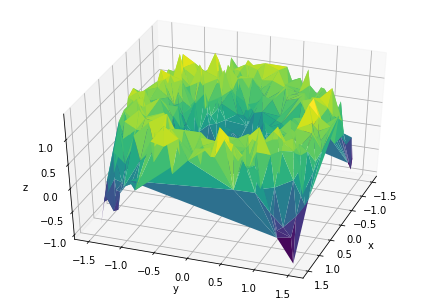

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x_valid[:,0],x_valid[:,1], z_valid, cmap='viridis', edgecolor = 'none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40,20)
plt.show()

Questo è il grafico della funzione che la rete neurale deve essere in grado di fittare.

In [0]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='tanh'))


In [0]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=z_train, batch_size=50, epochs=100, shuffle=True,validation_data=(x_valid,z_valid), verbose=0)

10/10 [==============================] - 0s 1ms/step - loss: 0.0598 - mse: 0.0598

Test loss: 0.05975104495882988
Test Accuracy: 0.05975104495882988
10/10 [==============================] - 0s 1ms/step - loss: 0.0196 - mse: 0.0196

Test loss: 0.01958025060594082
Test Accuracy: 0.01958025060594082


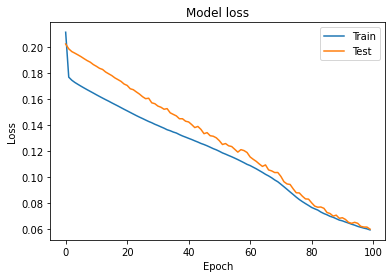

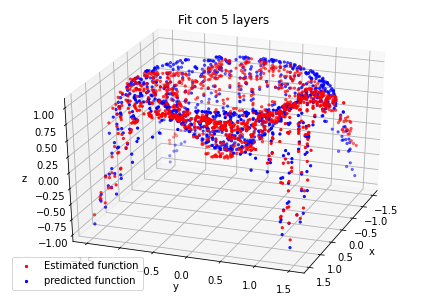

In [71]:
score = model.evaluate(x_valid, z_valid, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

score = model.evaluate(x_valid, z_target, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best'); plt.show()

#x_new=np.zeros((2000,2))
#z_new=np.zeros(2000)

#for i in range(n_valid):
x_new = 3*np.random.random_sample((1000,2))-1.5
z_new = model.predict(x_new[:,:])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_new[:,0], x_new[:,1], z_new, marker = '.', color='r', label='Estimated function')
ax.scatter(x_new[:,0], x_new[:,1], np.sin(x_new[:,0]**2+x_new[:,1]**2), marker = '.', color='b', label='predicted function')
 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Fit con 5 layers')
plt.legend(loc='lower left')
ax.view_init(30,20)
plt.show()

Osservo che usando come funzione di ottimizzazione solo tanh o solo relu il fit non riesce a convergere. Ottengo dei buoni risultati andando ad alternare il loro utilizzo.
Ho raggiunto un livello di complessità della rete che mi permette di ottenere dei buoni risultati del fit.
